In [1]:
# Import relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
import missingno as msno

from datetime import datetime


import json
from pandas.io.json import json_normalize

In [2]:
#Setting style and font size for graphs
sns.set_style("whitegrid")
mpl.rcParams['font.size'] = 13

In [3]:
logins = 'logins.json'
# load json as string
json.load(open(logins))

{'login_time': ['1970-01-01 20:13:18',
  '1970-01-01 20:16:10',
  '1970-01-01 20:16:37',
  '1970-01-01 20:16:36',
  '1970-01-01 20:26:21',
  '1970-01-01 20:21:41',
  '1970-01-01 20:12:16',
  '1970-01-01 20:35:47',
  '1970-01-01 20:35:38',
  '1970-01-01 20:47:52',
  '1970-01-01 20:26:05',
  '1970-01-01 20:31:03',
  '1970-01-01 20:34:46',
  '1970-01-01 20:36:34',
  '1970-01-01 20:39:25',
  '1970-01-01 20:40:37',
  '1970-01-01 20:34:58',
  '1970-01-01 20:43:59',
  '1970-01-01 20:47:46',
  '1970-01-01 20:46:34',
  '1970-01-01 20:56:07',
  '1970-01-01 20:49:12',
  '1970-01-01 20:59:06',
  '1970-01-01 20:59:59',
  '1970-01-01 21:15:01',
  '1970-01-01 21:09:24',
  '1970-01-01 21:19:24',
  '1970-01-01 21:20:53',
  '1970-01-01 21:29:19',
  '1970-01-01 21:58:05',
  '1970-01-01 21:51:51',
  '1970-01-01 21:59:40',
  '1970-01-01 22:08:34',
  '1970-01-01 22:02:51',
  '1970-01-01 21:58:32',
  '1970-01-01 22:02:31',
  '1970-01-01 22:05:32',
  '1970-01-01 22:02:46',
  '1970-01-01 22:10:28',
  '1970-01-

In [4]:
# Loading json into a dataframe
df = pd.read_json(logins).reset_index()
df.set_index('login_time',inplace = True)
df.head(10)

,index
login_time,
1970-01-01 20:13:18,0
1970-01-01 20:16:10,1
1970-01-01 20:16:37,2
1970-01-01 20:16:36,3
1970-01-01 20:26:21,4
1970-01-01 20:21:41,5
1970-01-01 20:12:16,6
1970-01-01 20:35:47,7
1970-01-01 20:35:38,8


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93142 entries, 1970-01-01 20:13:18 to 1970-04-13 18:54:23
Data columns (total 1 columns):
index    93142 non-null int64
dtypes: int64(1)
memory usage: 1.4 MB


In [6]:
# Resampling the timeseries for 15 mins
df = df.resample('15T').count()

## Extracting Time Features

In [7]:
df['date'] = df.index
df['date'] = df['date'].apply(lambda x: datetime.date(x))
df['date'] = pd.to_datetime(df['date'], infer_datetime_format = True)
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['time'] = df.index
df['time'] = pd.to_datetime(df['time'], infer_datetime_format = True)
df['time'] = df['time'].apply(lambda x: datetime.time(x))
df['hour'] = df['time'].apply(lambda x: x.hour)
df['weekday'] = df['date'].dt.weekday+1
df['weeknum'] = df['date'].dt.week

df = df.rename(columns = {'index':'count'})
#df = df_15m.rename(columns=str)
df.head()

,count,date,day,month,time,hour,weekday,weeknum
login_time,,,,,,,,
1970-01-01 20:00:00,2,1970-01-01,1,1,20:00:00,20,4,1
1970-01-01 20:15:00,6,1970-01-01,1,1,20:15:00,20,4,1
1970-01-01 20:30:00,9,1970-01-01,1,1,20:30:00,20,4,1
1970-01-01 20:45:00,7,1970-01-01,1,1,20:45:00,20,4,1
1970-01-01 21:00:00,1,1970-01-01,1,1,21:00:00,21,4,1


### There are no null values

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 8 columns):
count      9788 non-null int64
date       9788 non-null datetime64[ns]
day        9788 non-null int64
month      9788 non-null int64
time       9788 non-null object
hour       9788 non-null int64
weekday    9788 non-null int64
weeknum    9788 non-null int64
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 688.2+ KB


## Overall Trend

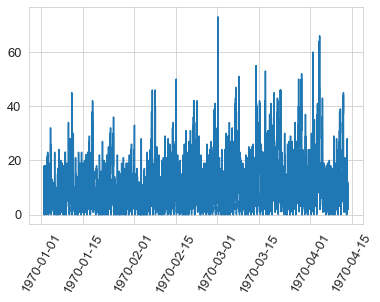

In [9]:
register_matplotlib_converters()
_ = plt.plot(df['count'])
_ = plt.xticks(rotation = 60)
#_ = plt.yscale('log')

## Daily Trend
#### There are cycles with increasing trend till april post that there is decreasing trend

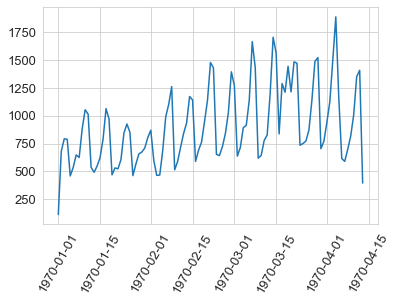

In [10]:
day = df.groupby('date')['count'].sum()
_ = plt.plot(day)
_ = plt.xticks(rotation = 60)

## Monthly Trend
#### In April there is a fall in demand but this is due to data available till 15th Apr. It would be better if we look at avg. logins per day for each month

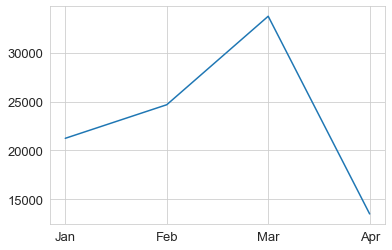

In [11]:
month = df.groupby('month')['count'].sum()
_ = plt.plot(month)
_ = plt.xticks(ticks = [1,2,3,4], labels = ['Jan', 'Feb', 'Mar', 'Apr'])


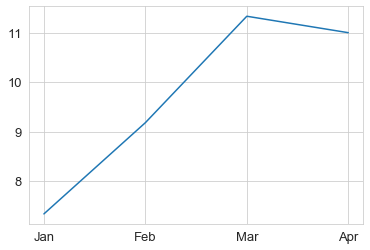

In [12]:
month = df.groupby('month')['count'].mean()
_ = plt.plot(month)
_ = plt.xticks(ticks = [1,2,3,4], labels = ['Jan', 'Feb', 'Mar', 'Apr'])


## Month Wise Daily Trend
#### The daily cycles for month 1 and month 3 are in sync while 2 and 4 are in sync. This cycles may be due to weekdays.

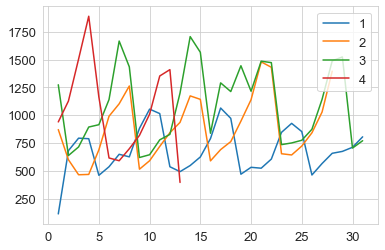

In [13]:
month = df.groupby(['month','day'])['count'].sum().unstack(0)
labels = month.columns
_ = plt.plot(month)
_ = plt.legend(labels = labels, loc="upper right")


## Weekday Trend
#### This shows that user logins are most during staturday, followed by sunday and saturday. There is one abnormal week where this trend is not followed. 

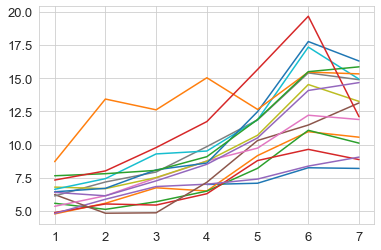

In [14]:
week = df.groupby(['weeknum','weekday'])['count'].mean().unstack(0)
_ = plt.plot(week)

## Hourly Trend
#### Users are most active during night from 22hrs to 4 hrs and during morning from 11hrs to 13 hrs.  

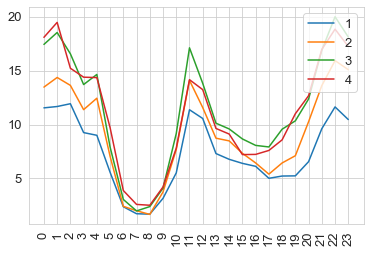

In [15]:
month_hour = df.groupby(['month','hour'])['count'].mean().unstack(0).fillna(0)
ticks = list(range(0,24))

_ = plt.plot(month_hour)
_ = plt.legend(labels = labels, loc="upper right")
_ = plt.xticks(ticks = ticks)
_ = plt.xticks(rotation = 90)

# Challenge 2

In [31]:
file = 'ultimate_data_challenge.json'
# load json as string
data = json.load(open(file))
data = pd.DataFrame(data)
data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


## Missing Values

In [33]:
data.isnull().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
dtype: int64

In [34]:
data.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


### Replacing Missing values for ratings with median rating. Mean was not used since its a skewed distribution. 

In [35]:
# Replacing missing values for rating by driver
median_rating_by_driver = data.avg_rating_by_driver.median()
data.avg_rating_by_driver = data.avg_rating_by_driver.fillna(median_rating_by_driver)

# Replacing missing values for rating of driver
median_rating_of_driver = data.avg_rating_of_driver.median()
data.avg_rating_of_driver = data.avg_rating_of_driver.fillna(median_rating_of_driver)

# Replacing missing values for phone with "Missing" Category
data.phone = data.phone.fillna("Missing")


In [36]:
data.isnull().sum()

avg_dist                  0
avg_rating_by_driver      0
avg_rating_of_driver      0
avg_surge                 0
city                      0
last_trip_date            0
phone                     0
signup_date               0
surge_pct                 0
trips_in_first_30_days    0
ultimate_black_user       0
weekday_pct               0
dtype: int64

### Creating Duration and retain features

In [37]:
data.last_trip_date.max()

'2014-07-01'

In [38]:
data.signup_date = pd.to_datetime(data.signup_date, infer_datetime_format = True)
data.last_trip_date = pd.to_datetime(data.last_trip_date, infer_datetime_format = True)

data['duration'] = (data.last_trip_date - data.signup_date)//np.timedelta64(1, 'D')

# A customer is said to be retained if he has taken trips in preceding 30 days
data['retain'] = data.last_trip_date.apply(lambda x: 0 if x < datetime(2014, 6, 1)  else 1)

data['signup_weekday'] = (data.signup_date.dt.weekday)+1

drop_col = ['last_trip_date', 'signup_date']
data = data.drop(drop_col, axis = 1)

In [39]:
data.retain.value_counts(normalize = True)

0    0.62392
1    0.37608
Name: retain, dtype: float64

### Exploratory Data Analysis

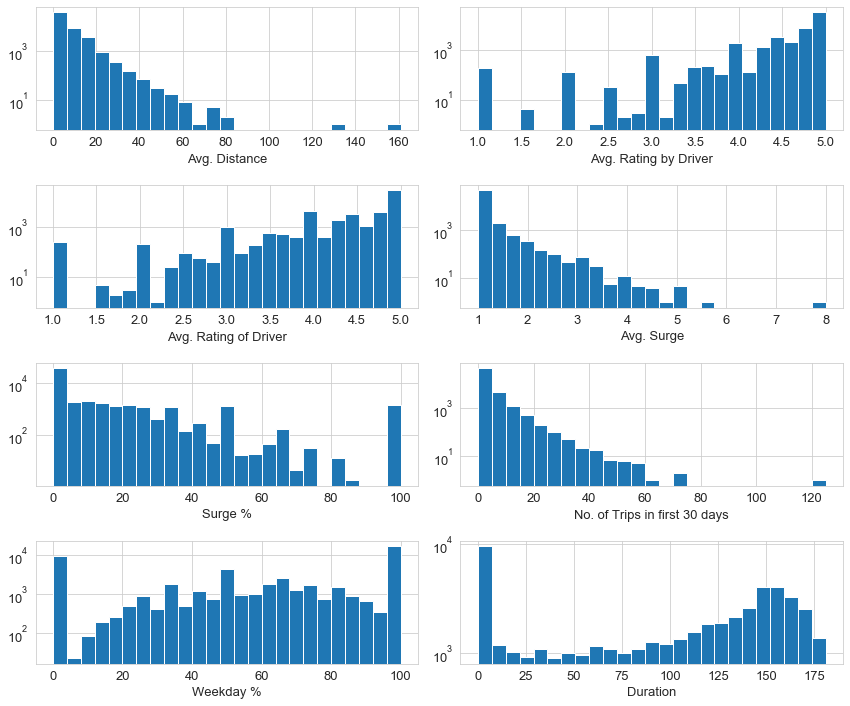

In [40]:
fig_dims = (12, 10)
fig, ax = plt.subplots(nrows = 4, ncols = 2,figsize=fig_dims)

#Plot the Numeric Variables
ax[0][0].hist(data.avg_dist, bins = 25)
ax[0][1].hist(data.avg_rating_by_driver, bins = 25)
ax[1][0].hist(data.avg_rating_of_driver, bins = 25)
ax[1][1].hist(data.avg_surge, bins = 25)
ax[2][0].hist(data.surge_pct, bins = 25)
ax[2][1].hist(data.trips_in_first_30_days, bins = 25)
ax[3][0].hist(data.weekday_pct, bins = 25)
ax[3][1].hist(data.duration, bins = 25)

#Set Axis labels
ax[0][0].set_xlabel('Avg. Distance')
ax[0][1].set_xlabel('Avg. Rating by Driver')
ax[1][0].set_xlabel('Avg. Rating of Driver')
ax[1][1].set_xlabel('Avg. Surge')
ax[2][0].set_xlabel('Surge %')
ax[2][1].set_xlabel('No. of Trips in first 30 days')
ax[3][0].set_xlabel('Weekday %')
ax[3][1].set_xlabel('Duration')

#change y scale to log for better visualization
ax[0][0].set_yscale('log')
ax[0][1].set_yscale('log')
ax[1][0].set_yscale('log')
ax[1][1].set_yscale('log')
ax[2][0].set_yscale('log')
ax[2][1].set_yscale('log')
ax[3][0].set_yscale('log')
ax[3][1].set_yscale('log')

plt.tight_layout()

- All the distribution are log normal. 
- There are few outliers present in No. of trips and avg. distance. But they are possible values and this will be kept as it is
- There a number of users that only travel during weekday and some travel only during weekend.

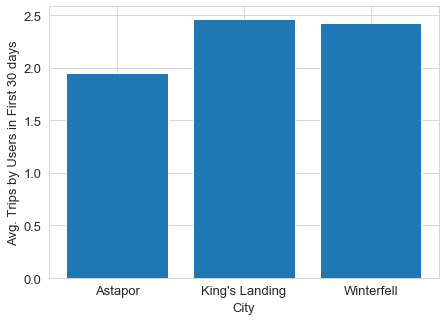

In [41]:
x = data.groupby('city')['trips_in_first_30_days'].mean()
_ = plt.bar(x.index, height = x)
_ = plt.xlabel('City')
_ = plt.ylabel('Avg. Trips by Users in First 30 days')

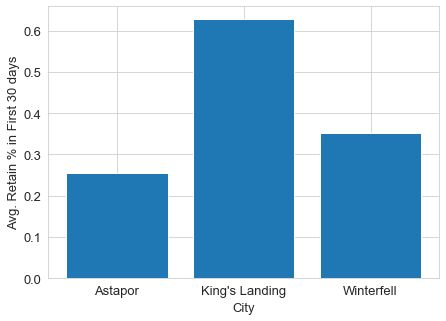

In [42]:
x = data.groupby('city')['retain'].mean()
_ = plt.bar(x.index, height = x)
_ = plt.xlabel('City')
_ = plt.ylabel('Avg. Retain % in First 30 days')

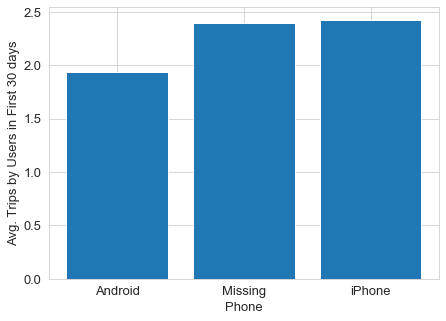

In [43]:
x = data.groupby('phone')['trips_in_first_30_days'].mean()
_ = plt.bar(x.index, height = x)
_ = plt.xlabel('Phone')
_ = plt.ylabel('Avg. Trips by Users in First 30 days')

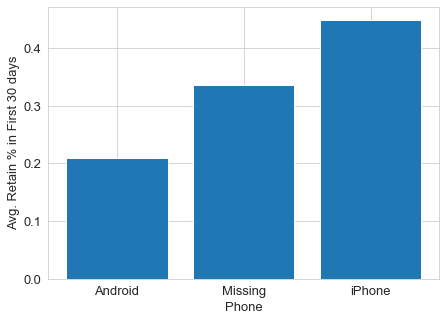

In [44]:
x = data.groupby('phone')['retain'].mean()
_ = plt.bar(x.index, height = x)
_ = plt.xlabel('Phone')
_ = plt.ylabel('Avg. Retain % in First 30 days')

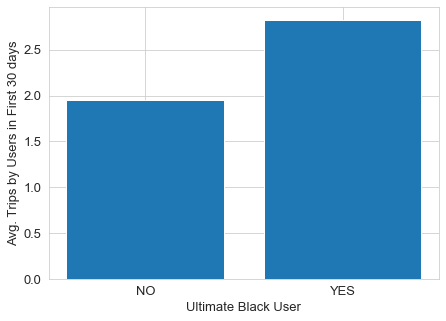

In [45]:
x = data.groupby('ultimate_black_user')['trips_in_first_30_days'].mean()
_ = plt.bar(x.index, height = x)
_ = plt.xlabel('Ultimate Black User')
_ = plt.ylabel('Avg. Trips by Users in First 30 days')
_ = plt.xticks(ticks = [0,1], labels = ['NO', 'YES'] )

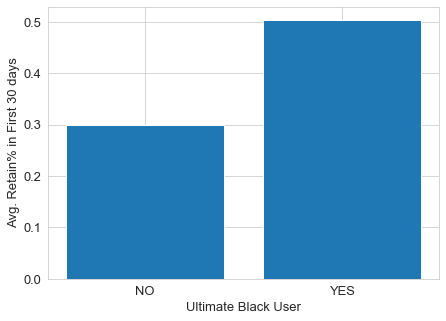

In [46]:
x = data.groupby('ultimate_black_user')['retain'].mean()
_ = plt.bar(x.index, height = x)
_ = plt.xlabel('Ultimate Black User')
_ = plt.ylabel('Avg. Retain% in First 30 days')
_ = plt.xticks(ticks = [0,1], labels = ['NO', 'YES'] )

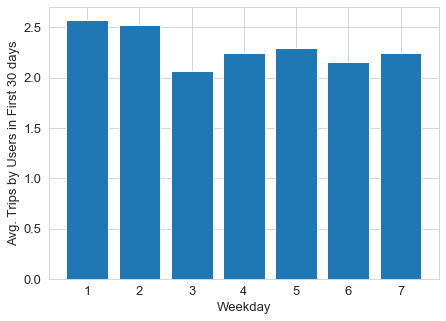

In [47]:
x = data.groupby('signup_weekday')['trips_in_first_30_days'].mean()
_ = plt.bar(x.index, height = x)
_ = plt.xlabel('Weekday')
_ = plt.ylabel('Avg. Trips by Users in First 30 days')
#_ = plt.xticks(ticks = [0,1], labels = ['NO', 'YES'] )

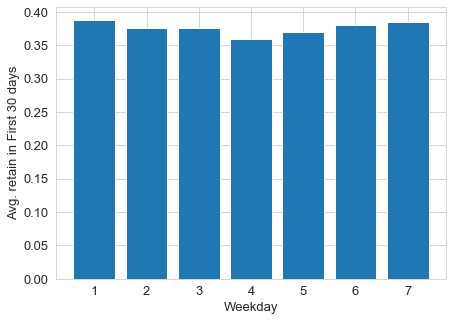

In [48]:
x = data.groupby('signup_weekday')['retain'].mean()
_ = plt.bar(x.index, height = x)
_ = plt.xlabel('Weekday')
_ = plt.ylabel('Avg. retain in First 30 days')

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
phone                     50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
duration                  50000 non-null int64
retain                    50000 non-null int64
signup_weekday            50000 non-null int64
dtypes: bool(1), float64(6), int64(4), object(2)
memory usage: 4.6+ MB


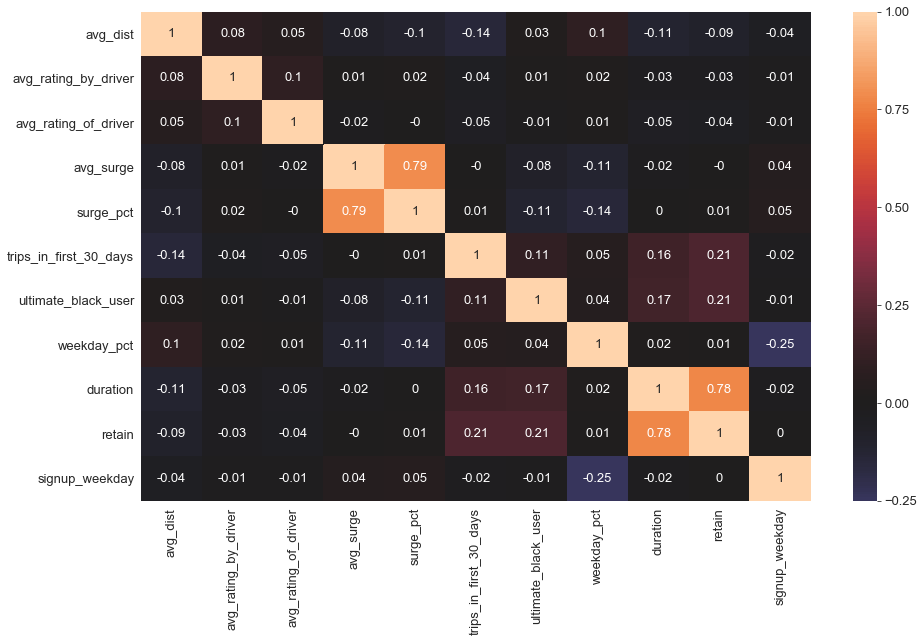

In [50]:
from IPython.core.pylabtools import figsize
numeric = data.select_dtypes(exclude = object)
corr_matrix = round(numeric.corr(),2)
figsize(15,9)
_ = sns.heatmap(corr_matrix, center = 0, annot=True)

In [51]:
figsize(7,5)

### Modelling

Encoding Categorical Variables

In [52]:
# One-hot-encode all categorical features
df_encoded = pd.get_dummies(data, columns = ['city', 'phone', 'ultimate_black_user'], drop_first = True)

df_encoded.head()

# drop Duration and signup Weekday
df_encoded = df_encoded.drop('duration',axis = 1)

Splitting Data into train and test data set

In [53]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('retain', axis = 1)
y = df_encoded.retain

#Splitting Data into Training and Test Data Set
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


In [54]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35000 entries, 38094 to 15795
Data columns (total 13 columns):
avg_dist                    35000 non-null float64
avg_rating_by_driver        35000 non-null float64
avg_rating_of_driver        35000 non-null float64
avg_surge                   35000 non-null float64
surge_pct                   35000 non-null float64
trips_in_first_30_days      35000 non-null int64
weekday_pct                 35000 non-null float64
signup_weekday              35000 non-null int64
city_King's Landing         35000 non-null uint8
city_Winterfell             35000 non-null uint8
phone_Missing               35000 non-null uint8
phone_iPhone                35000 non-null uint8
ultimate_black_user_True    35000 non-null uint8
dtypes: float64(6), int64(2), uint8(5)
memory usage: 2.6 MB


In [55]:
numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
duration                  50000 non-null int64
retain                    50000 non-null int64
signup_weekday            50000 non-null int64
dtypes: bool(1), float64(6), int64(4)
memory usage: 3.9 MB


In [56]:
# Copy of Data set
X_train_norm = X_train.copy()
X_test_norm = X_test.copy()

In [57]:
# data normalization with sklearn
from sklearn.preprocessing import PowerTransformer

# Copy of Data set
X_train_norm = X_train.copy()
X_test_norm = X_test.copy()

numeric = numeric.drop(['ultimate_black_user', 'duration', 'retain'], axis = 1)
for i in numeric:
    
    # fit on training data column
    scale = PowerTransformer().fit(X_train_norm[[i]])
    
    # transform the training data column
    X_train_norm[i] = scale.transform(X_train_norm[[i]])
    
    # transform the testing data column
    X_test_norm[i] = scale.transform(X_test_norm[[i]])

In [58]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# Copy of Data set
#X_train_norm = X_train.copy()
#X_test_norm = X_test.copy()

#numeric = numeric.drop(['ultimate_black_user'], axis = 1)
for i in numeric:
    
    # fit on training data column
    scale = MinMaxScaler().fit(X_train_norm[[i]])
    
    # transform the training data column
    X_train_norm[i] = scale.transform(X_train_norm[[i]])
    
    # transform the testing data column
    X_test_norm[i] = scale.transform(X_test_norm[[i]])

In [59]:
# Base Line Evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, balanced_accuracy_score, plot_roc_curve
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.metrics import plot_confusion_matrix, precision_recall_fscore_support,log_loss
class_names = ['Not Retained', 'Retained']



In [60]:
def auc_curve(y_test,y_pred_test,auc_test):
    fpr,tpr, threshold = roc_curve(y_test, y_pred_test)
    _ = plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.4f)' %auc_test )
    _ = plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    _ = plt.xlim([0.0, 1.0])
    _ = plt.ylim([0.0, 1.05])
    _ = plt.xlabel('False Positive Rate')
    _ = plt.ylabel('True Positive Rate')
    _ = plt.title('Receiver operating characteristic example')
    _ = plt.legend(loc="lower right")


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished


Training accuracy: 0.4665
Test accuracy    : 0.4593
Training AUC Score: 0.7341
Testing AUC Score: 0.7358
Classification Report - Training
              precision    recall  f1-score   support

           0       0.89      0.16      0.28     21817
           1       0.41      0.97      0.58     13183

    accuracy                           0.47     35000
   macro avg       0.65      0.57      0.43     35000
weighted avg       0.71      0.47      0.39     35000

Classification Report - Testing
              precision    recall  f1-score   support

Not Retained       0.90      0.15      0.26      9379
    Retained       0.41      0.97      0.57      5621

    accuracy                           0.46     15000
   macro avg       0.65      0.56      0.42     15000
weighted avg       0.71      0.46      0.38     15000



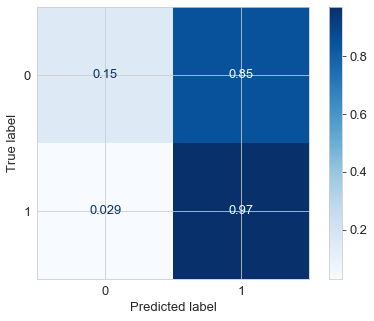

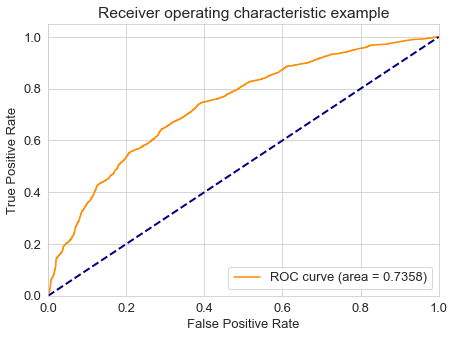

In [69]:
# Base Line Evaluation

#Building the Logistic Regression Model
lr = LogisticRegression(max_iter = 4000, verbose = 1, class_weight = 'balanced')

lr.fit(X_train,y_train)

#Predicting for testing and trainig data sets
y_test_proba = lr.predict_proba(X_test_norm)[:,1]
y_train_proba = lr.predict_proba(X_train_norm)[:,1]

y_pred_test = lr.predict(X_test_norm)
y_pred_train = lr.predict(X_train_norm)

#Accuracy Score
print("Training accuracy: %0.4f" %lr.score(X_train_norm, y_train))
print("Test accuracy    : %0.4f" %lr.score(X_test_norm, y_test))
#print("Test log loss    : %0.4f" %log_loss(y_train, lr.predict_proba(X_train)))
#AUC Score
auc_train = roc_auc_score(y_train,y_train_proba)
auc_test = roc_auc_score(y_test,y_test_proba)

print('Training AUC Score: %0.4f' %auc_train)  
print('Testing AUC Score: %0.4f' %auc_test)          

print('Classification Report - Training')
print(classification_report(y_train,y_pred_train))

print('Classification Report - Testing')
print(classification_report(y_test,y_pred_test,target_names = class_names))

plot_confusion_matrix(lr, X_test_norm, y_test,  cmap=plt.cm.Blues, normalize = 'true') #display_labels=class_names,
plt.show()
auc_curve(y_test,y_test_proba,auc_test)

In [73]:
from sklearn.model_selection import GridSearchCV

#C = [0.01,0.05, 0.1, 0.5]
C = np.logspace(-3,-1,10)
penalty = ['l1', 'l2']
model1 = ['lbfgs', 'liblinear']
param_grid = {'solver': model1, 'C': C}

lr = LogisticRegression(max_iter = 5000, verbose = 0, class_weight = 'balanced')

cv = GridSearchCV(lr,param_grid, cv=5, scoring = 'roc_auc')#, n_jobs = 3)

cv.fit(X_train_norm,y_train)

print(cv.best_params_)
print(cv.best_score_)

{'C': 0.1, 'solver': 'lbfgs'}
0.7962925125240952


Training accuracy: 0.7251
Test accuracy    : 0.7217
Training AUC Score: 0.7969
Testing AUC Score: 0.7942
Classification Report - Training
              precision    recall  f1-score   support

           0       0.81      0.73      0.77     21817
           1       0.62      0.71      0.66     13183

    accuracy                           0.73     35000
   macro avg       0.71      0.72      0.71     35000
weighted avg       0.74      0.73      0.73     35000

Classification Report - Testing
              precision    recall  f1-score   support

Not Retained       0.81      0.73      0.77      9379
    Retained       0.61      0.71      0.66      5621

    accuracy                           0.72     15000
   macro avg       0.71      0.72      0.71     15000
weighted avg       0.73      0.72      0.73     15000



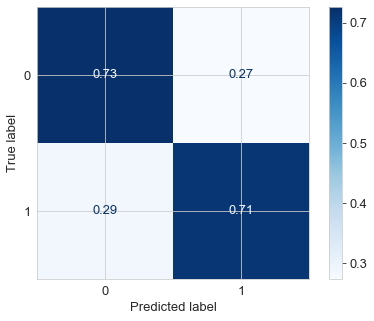

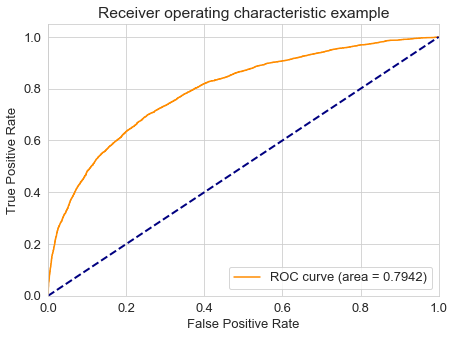

In [71]:
best_lr = cv.best_estimator_

best_lr.fit(X_train_norm,y_train)

#Predicting for testing and trainig data sets
y_test_proba = best_lr.predict_proba(X_test_norm)[:,1]
y_train_proba = best_lr.predict_proba(X_train_norm)[:,1]

y_pred_test = best_lr.predict(X_test_norm)
y_pred_train = best_lr.predict(X_train_norm)

#Accuracy Score
print("Training accuracy: %0.4f" %best_lr.score(X_train_norm, y_train))
print("Test accuracy    : %0.4f" %best_lr.score(X_test_norm, y_test))
#print("Test log loss    : %0.4f" %log_loss(y_train, lr.predict_proba(X_train)))
#AUC Score
auc_train = roc_auc_score(y_train,y_train_proba)
auc_test = roc_auc_score(y_test,y_test_proba)

print('Training AUC Score: %0.4f' %auc_train)  
print('Testing AUC Score: %0.4f' %auc_test)          

print('Classification Report - Training')
print(classification_report(y_train,y_pred_train))

print('Classification Report - Testing')
print(classification_report(y_test,y_pred_test,target_names = class_names))

plot_confusion_matrix(best_lr, X_test_norm, y_test,  cmap=plt.cm.Blues, normalize = 'true') #display_labels=class_names,
plt.show()
auc_curve(y_test,y_test_proba,auc_test)


In [76]:
coefficients1 = best_lr.coef_[0]
coef = pd.DataFrame(coefficients1, index = X_train_norm.columns, columns = ['Coefficient'])
coef.sort_values('Coefficient', inplace = True)
#print("Zero Coefficient Features")
#print(coef[coef.Coefficient == 0])
print(coef)

                          Coefficient
avg_surge                   -1.958180
avg_rating_by_driver        -1.054927
avg_rating_of_driver        -0.403211
signup_weekday               0.021134
avg_dist                     0.170958
weekday_pct                  0.175180
trips_in_first_30_days       0.225728
phone_Missing                0.387772
city_Winterfell              0.507372
ultimate_black_user_True     0.869121
phone_iPhone                 1.021897
city_King's Landing          1.785587
surge_pct                    2.711562


Actions to improve Customer retaintion

- Driving customers to become ultimate black user 
- Since iPhone users have more retaintion than android phones, improving android experience will let to more customer retention
- Encouraging users to take more long distance trips
- Focus on more marketing campaigns for Winterfell and other cities where retaintion is lower
- Giving some discounts during surge might help in more customer retention.